## Import Libraries

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import mglearn  
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

## Load Data

In [151]:
data = pd.read_csv('train.csv')
data.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5
1,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
2,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
3,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
4,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
5,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6
6,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
7,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
8,7.8,0.560,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,5
9,6.6,0.500,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1000 non-null   float64
 1   volatile.acidity      1000 non-null   float64
 2   citric.acid           1000 non-null   float64
 3   residual.sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free.sulfur.dioxide   1000 non-null   float64
 6   total.sulfur.dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [153]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1000.0,8.301300,1.713092,4.70000,7.100000,7.90000,9.200000,15.9000
volatile.acidity,1000.0,0.523645,0.172574,0.12000,0.395000,0.51000,0.630000,1.5800
citric.acid,1000.0,0.268310,0.194616,0.00000,0.090000,0.25000,0.420000,1.0000
residual.sugar,1000.0,2.552300,1.429940,0.90000,1.900000,2.20000,2.600000,15.5000
chlorides,1000.0,0.087091,0.048161,0.01200,0.070000,0.07900,0.090000,0.6110
free.sulfur.dioxide,1000.0,15.862500,10.255048,1.00000,8.000000,14.00000,21.000000,72.0000
total.sulfur.dioxide,1000.0,46.255500,32.748579,6.00000,23.000000,38.00000,60.000000,289.0000
density,1000.0,0.996713,0.001880,0.99007,0.995567,0.99673,0.997833,1.0032
pH,1000.0,3.306920,0.151222,2.74000,3.210000,3.31000,3.400000,4.0100
sulphates,1000.0,0.654180,0.168285,0.33000,0.550000,0.62000,0.720000,2.0000


## Data Cleaning

### Missing values

In [154]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [155]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


In [156]:

total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


### Distribution of data

### data before deleting outliers

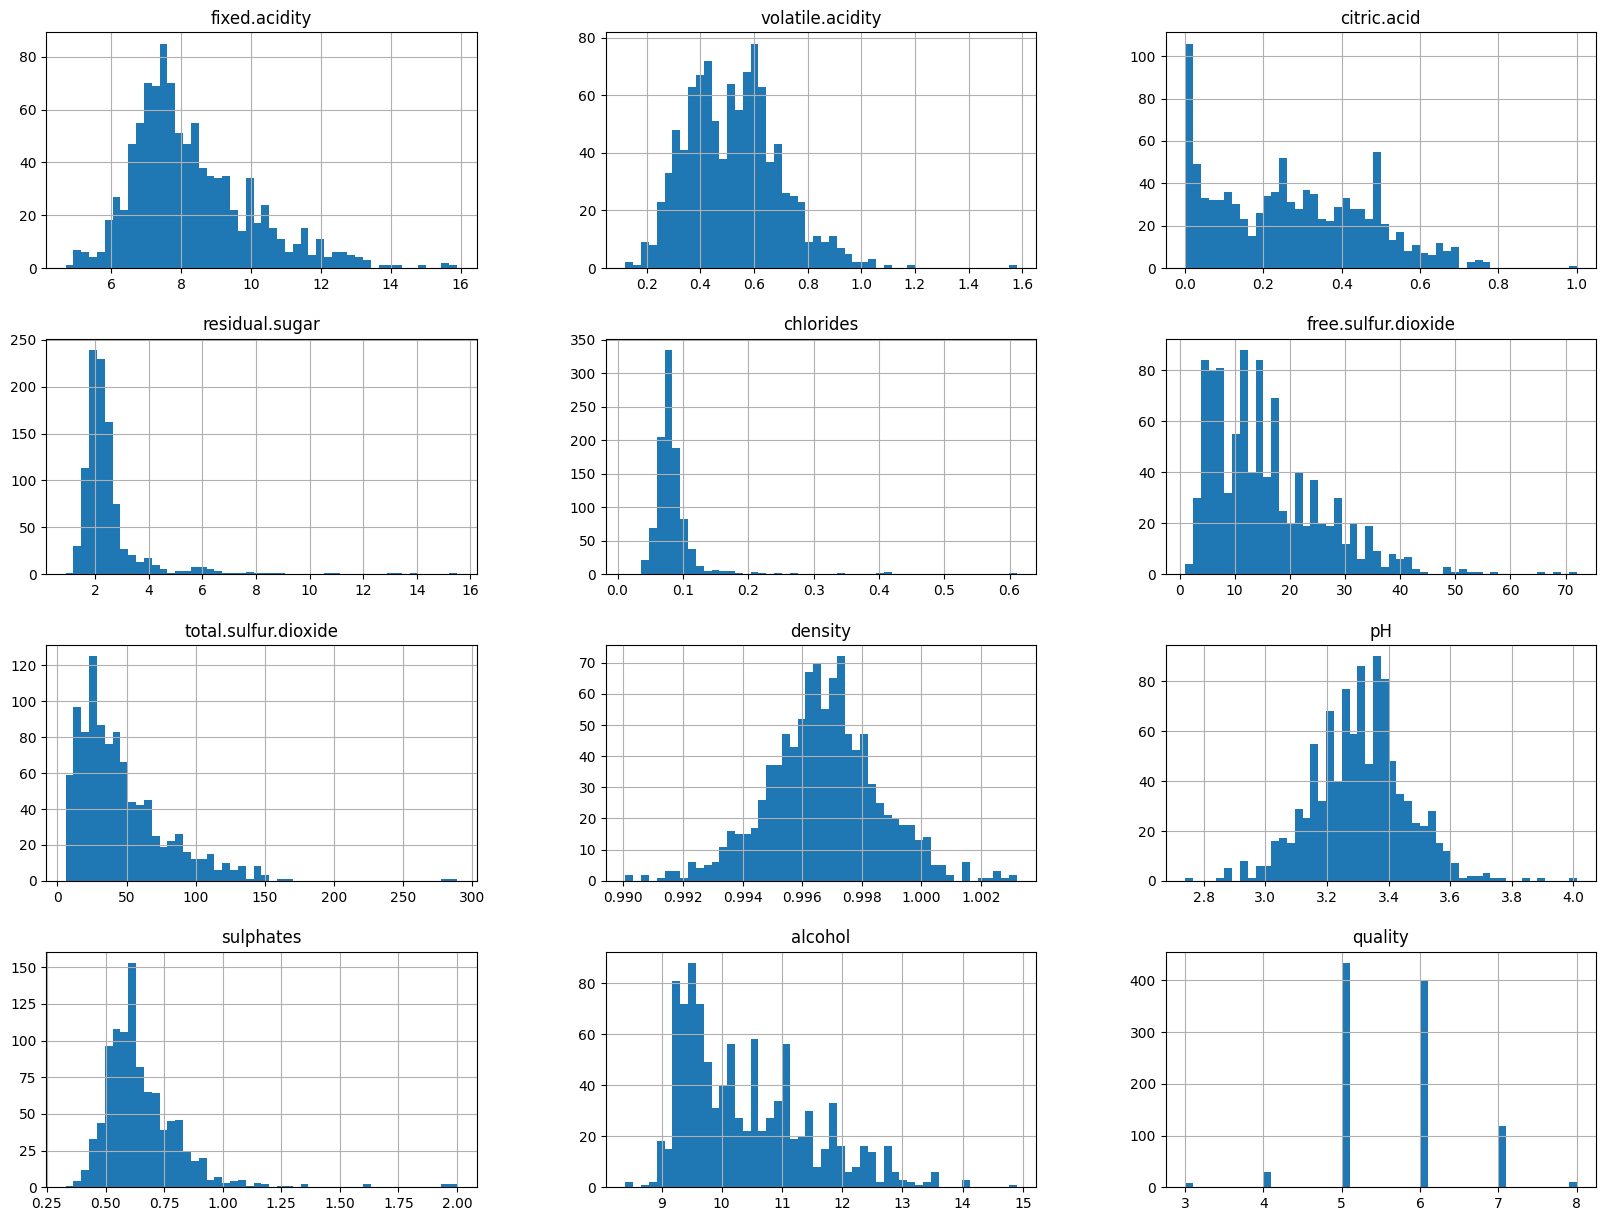

In [157]:
data.hist(bins=50, figsize=(20,15))
plt.show()

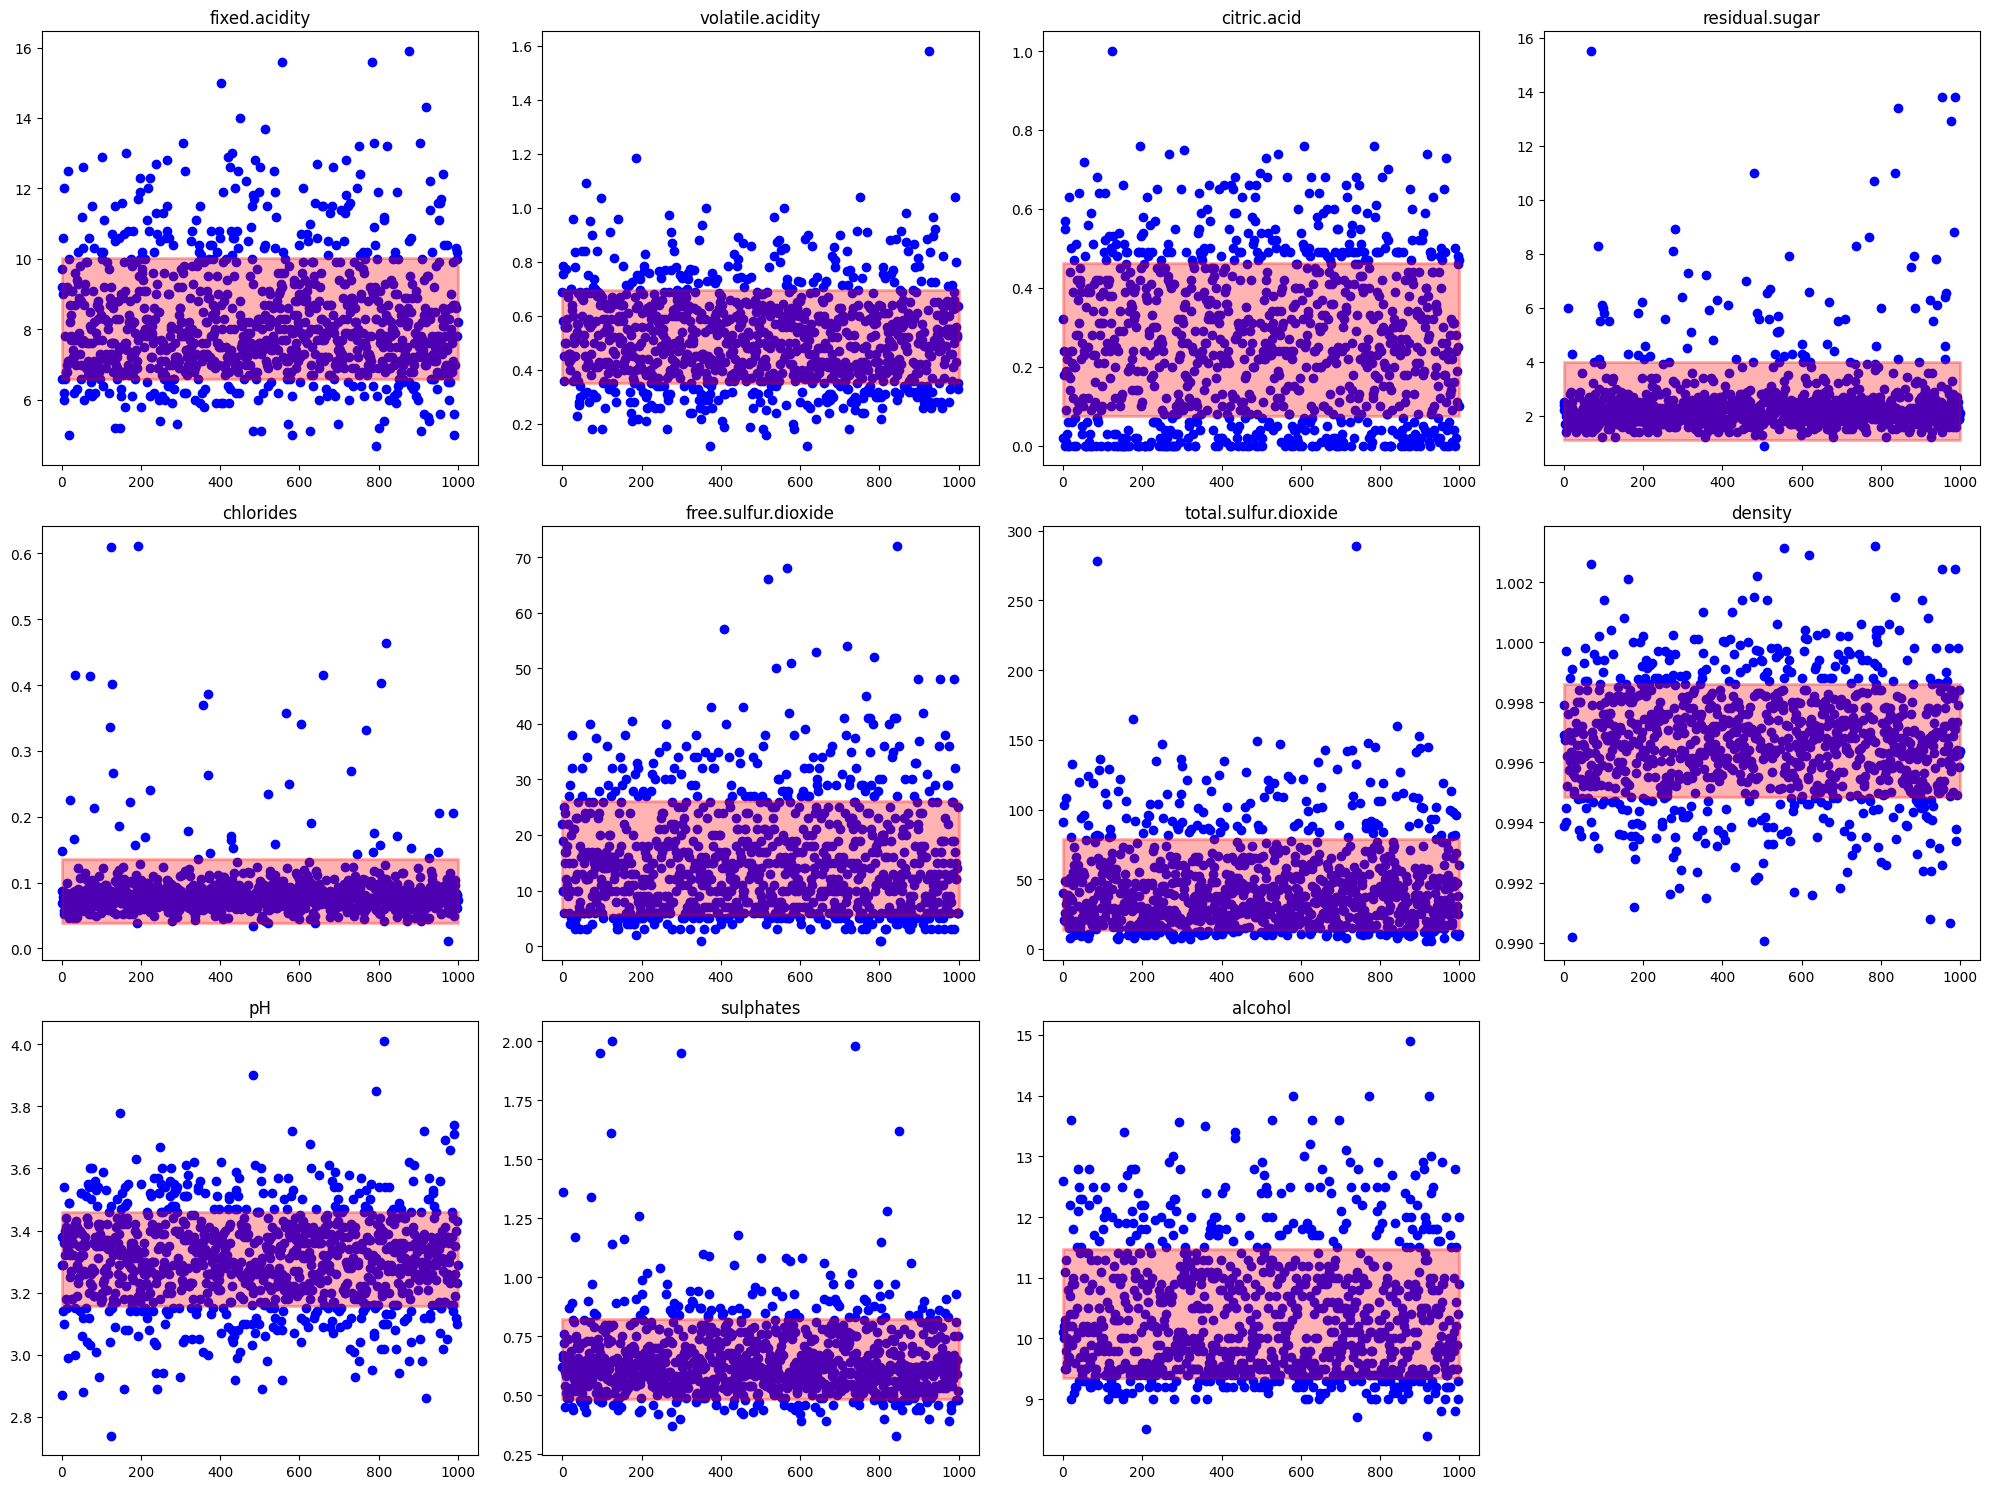

In [158]:
columns = [
    'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

plt.figure(figsize=(20, 15))

# 绘制散点图并添加红色矩形
for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    plt.scatter(data.index, data[column], color='blue')

    mean = data[column].mean()
    std = data[column].std()
    
    # 创建一个矩形，垂直方向覆盖均值±标准差，水平方向覆盖全部数据
    rect = patches.Rectangle((0, mean - std), len(data), 2 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)  # 将矩形添加到当前的Axes对象中

    plt.title(column)
    plt.tight_layout()

plt.show()

### data after deleting outliers

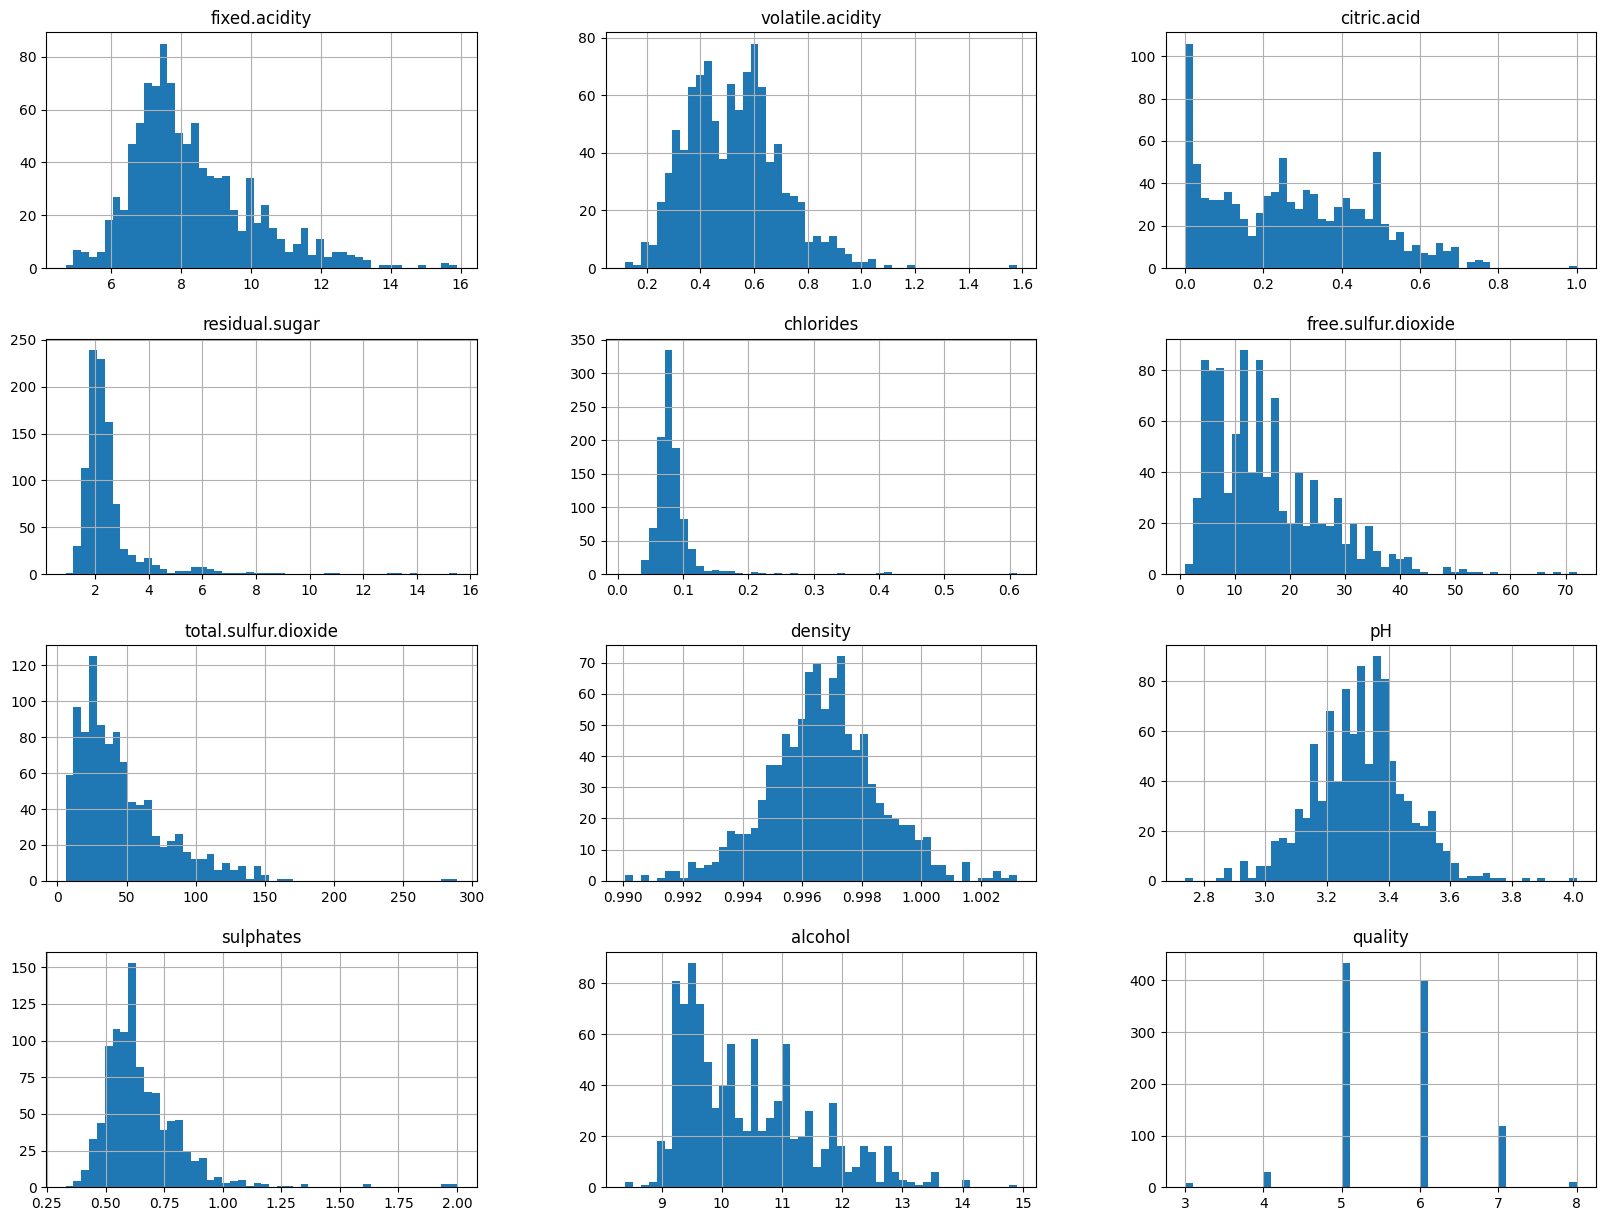

In [159]:
data.hist(bins=50, figsize=(20,15))
plt.show()

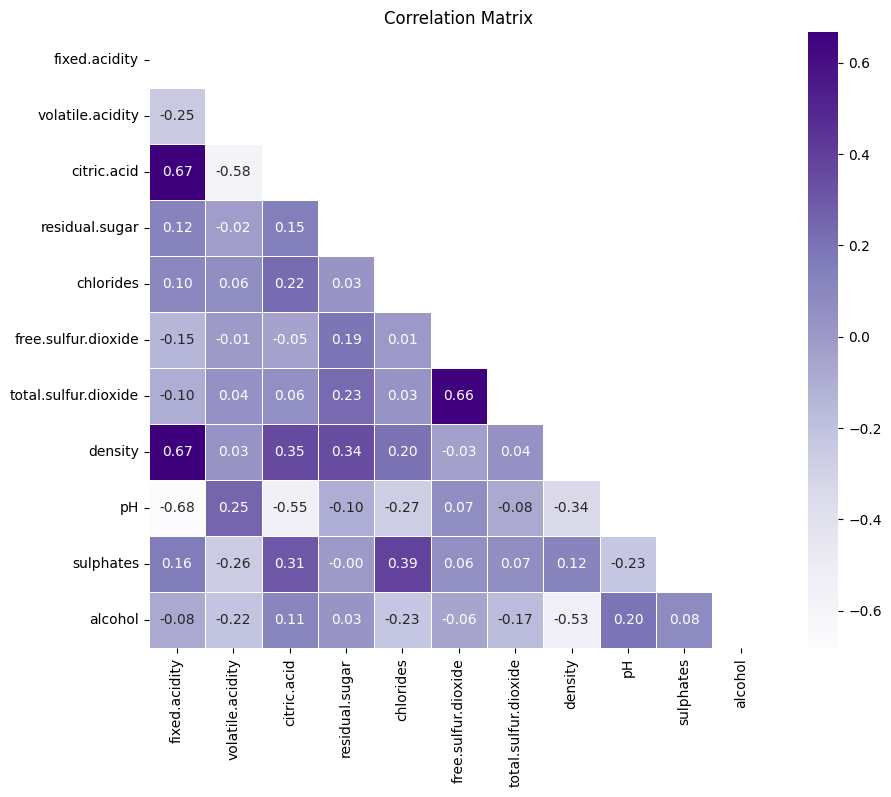

In [160]:
corr_matrix = data[columns].corr()

# 使用 seaborn 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,  annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr_matrix))
plt.title('Correlation Matrix')
plt.show()

In [161]:
# sns.pairplot(data, hue='quality', corner = True, palette='Purples')

## PCA

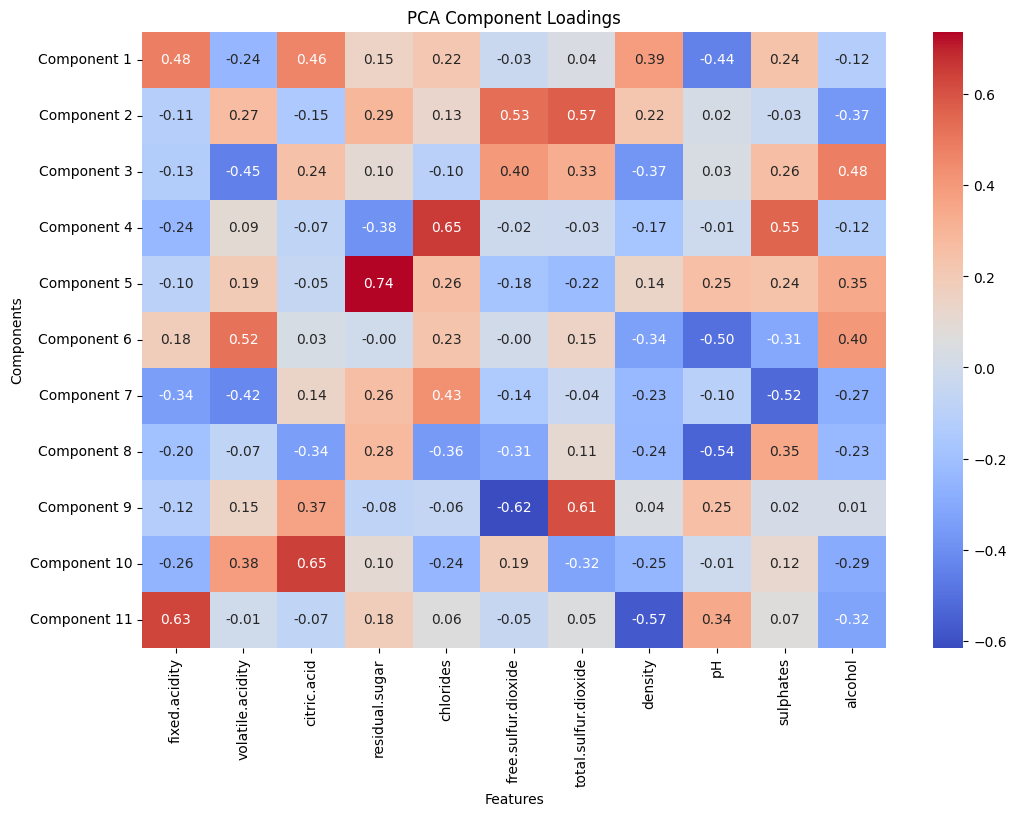

In [162]:
features = [col for col in data.columns if col != 'quality']

# 1. 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# 2. 应用 PCA，不限制主成分的数目
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# 3. 特征加载矩阵的热图
loadings = pca.components_
loading_matrix = pd.DataFrame(loadings, columns=features, index=[f"Component {i+1}" for i in range(loadings.shape[0])])

# 4. 使用 seaborn 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()


Number of components to explain xx% of variance: 7


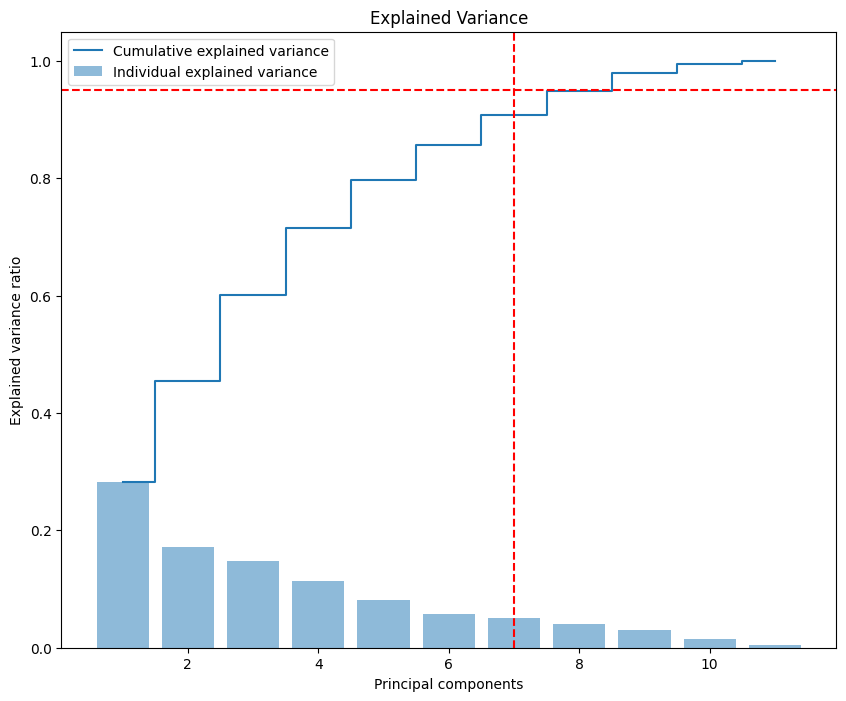

In [163]:
# 4. 计算累计方差解释比例
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 5. 确定覆盖至少95%总方差的主成分数
n_components = np.where(cumulative_variance >= 0.9)[0][0] + 1
print(f"Number of components to explain xx% of variance: {n_components}")

# 6. 可视化方差解释比例和累计方差解释比例
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='r', linestyle='--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance')
plt.legend(loc='best')
plt.show()

In [164]:
n_components = np.where(cumulative_variance >= 0.99)[0][0] + 1
pca = PCA(n_components)  # 只保留前9个主成分
principal_components = pca.fit_transform(data_scaled)

# 3. 将主成分得分与原始的 'quality' 列合并
pca_data = pd.DataFrame(data=principal_components, columns=[f"Component {i+1}" for i in range(n_components)])
pca_data['quality'] = data['quality']  # 添加 'quality' 列

# 4. 显示新的数据集
pca_data.head(20)  # 显示前几行以检查数据
data=pca_data
data

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,quality
0,0.597852,1.464666,-0.224425,-0.327211,-0.429651,0.642320,-0.737201,-0.467806,0.603045,-0.095256,5
1,-2.308777,-0.717975,1.330243,0.175993,0.672457,0.920714,-0.476857,0.229669,-0.486148,-0.477187,6
2,2.388331,1.052932,0.280970,3.297763,0.302622,1.371351,-2.183230,2.858643,0.678214,-0.346404,6
3,-0.218856,-0.389610,-1.495859,0.276599,-0.076622,0.531460,-0.884977,0.014813,0.026094,0.608650,5
4,2.086119,-1.930214,0.338243,-0.266295,-0.139465,0.364411,0.005492,0.014699,0.121955,0.214804,7
...,...,...,...,...,...,...,...,...,...,...,...
995,2.171016,-0.503708,-1.702460,-0.982026,-0.542655,-0.186332,-0.094878,0.180188,0.223431,0.437328,6
996,-0.137601,0.363803,-1.119125,0.159591,-0.385760,-1.369734,0.042014,-0.314274,0.219898,0.195294,6
997,1.427715,-1.929050,-0.416883,-0.811957,-0.950861,0.534660,0.980785,0.054270,-0.373054,0.047457,6
998,0.693052,-2.486595,0.523167,-1.103755,-0.227280,0.661541,0.246878,-0.452438,-0.032994,-0.126597,6


In [165]:
X = data.drop(['quality'],axis=1)
y = data['quality']

from imblearn.over_sampling import SMOTE
os = SMOTE()
x_res,y_res = os.fit_resample(X,y)

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

### Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test,predictions)

0.5911708253358925

### DecisionTree

In [168]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
accuracy_score(y_test,dt.predict(x_test_std))

0.7907869481765835

In [169]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_std,y_train)
accuracy_score(y_test,dt.predict(x_test_std))

0.8061420345489443

### RandomForest

In [170]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_std,y_train)
accuracy_score(y_test,rf.predict(x_test_std))

0.8925143953934741

Accuracy: 0.8214971209213052


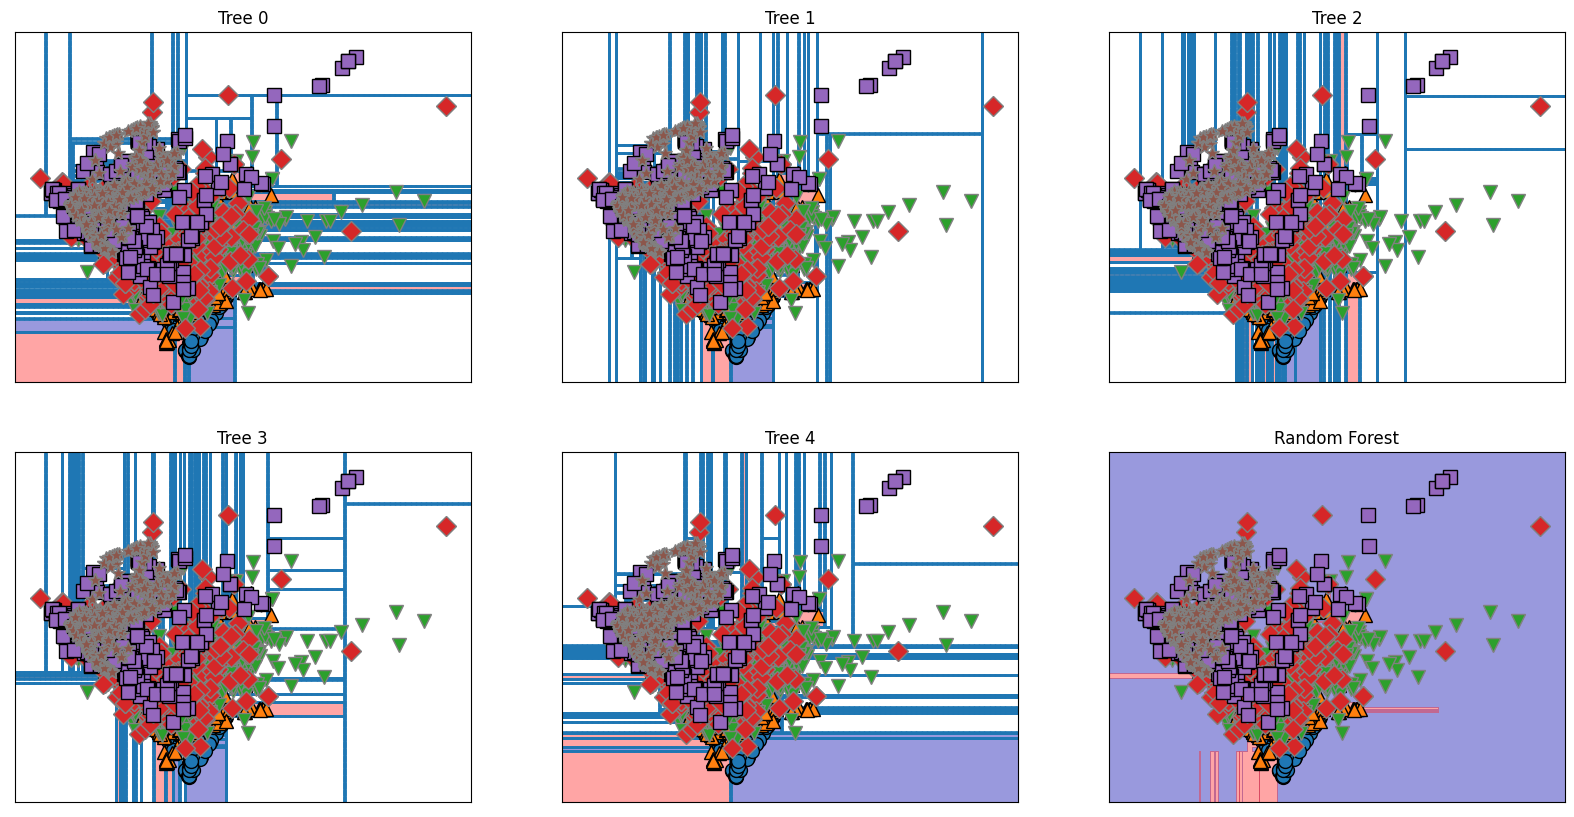

In [195]:
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(x_train_std, y_train)

# Compute accuracy on test set
accuracy = accuracy_score(y_test, rf.predict(x_test_std))
print(f"Accuracy: {accuracy}")

# Select the top two most important features for visualization
importances = rf.feature_importances_
top_two_indices = np.argsort(importances)[-2:]

# Train a new forest with only the two most important features
X_train_two_features = x_train_std[:, top_two_indices]
X_test_two_features = x_test_std[:, top_two_indices]
rf_two_features = RandomForestClassifier(n_estimators=5, random_state=42)
rf_two_features.fit(X_train_two_features, y_train)

# Randomly sample a subset of the data for clearer visualization
np.random.seed(42)
sample_indices = np.random.choice(X_train_two_features.shape[0], size=100, replace=False)  # Adjust size as needed
X_train_sampled = X_train_two_features[sample_indices]
y_train_sampled = y_train.iloc[sample_indices]  # 使用 Pandas 的 .iloc 来索引

# Visualization of each tree and the combined random forest
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf_two_features.estimators_)):
    ax.set_title(f'Tree {i}')
    mglearn.plots.plot_tree_partition(X_train_sampled, y_train_sampled, tree, ax=ax)

# Use mglearn to plot the decision boundary for the random forest
mglearn.plots.plot_2d_separator(rf_two_features, X_train_sampled, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train_sampled[:, 0], X_train_sampled[:, 1], y_train_sampled)
plt.show()